# Polynomial Regression Assignment (Please do not remove the output cells)

## The objective is to apply polynomial regression on the provided data using 3 regularization techniques

Tasks are defined below:
1-  Read the dataset, and get acquainted with its features and labels. Check the link below for more details about the data.  
https://archive.ics.uci.edu/ml/datasets/Air+Quality  

2-  This dataset has 5 different output labels. For this assignment we only need the NO2 output. Please drop other outputs.  

3-  Handle missing data similar to what was covered in tutorial 3.  

4-  Replace the date feature with 3 separate features (Day, Month and Year).  

5-  Replace the time feature with 3 separate features (Hours, Minutes and Seconds).  

6-  Apply feature scaling.  

7-  Evaluate different degrees of lasso CV polynomial regression.  

8-  Choose the best degree and print the errors on the test data, model coefficients and the lasso parameters.  

9-  Repeat steps 4 and 5 using Ridge CV polynomial regression.  

10- Repeat steps 4 and 5 using ElasticNet CV polynomial regression.  

11- Compare the errors from the 3 regularization techniques, and save the best model.  

12- Load the best model and test it on a sample that you manually created it.  


## Enter your IDs and Names below

1-   Alaa Amr Abdelazeem 46-12699
  
2-   Salma Khalid Sherif 46-5953


### Imports

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error

### 1- Read the data

In [114]:
df = pd.read_csv('AirQualityUCI.csv')

### 2- Drop unwanted labels

In [73]:
df = df.drop(['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)'], axis = 1)

### 3- Handle missing data

In [74]:
#Observing the missing data
df.isnull().mean()*100
#As seen belor, it was observed that the missing rate which is 3.91151% is the same error in all features (except dat and time)
#Therefore, it might be the case that the missing data of those features occur in the same rows.

Date              0.00000
Time              0.00000
PT08.S1(CO)       3.91151
PT08.S2(NMHC)     3.91151
PT08.S3(NOx)      3.91151
NO2(GT)          17.54836
PT08.S4(NO2)      3.91151
PT08.S5(O3)       3.91151
T                 3.91151
RH                3.91151
AH                3.91151
dtype: float64

In [75]:
#Dropping the null values of 1 of the 8 features led to 0% error in all other 7 features too.
# Hence it is safe to drop these rows since they yield almost no information.
df = df.dropna(axis=0,subset= ['PT08.S4(NO2)'])
df.isnull().mean()*100

Date              0.000000
Time              0.000000
PT08.S1(CO)       0.000000
PT08.S2(NMHC)     0.000000
PT08.S3(NOx)      0.000000
NO2(GT)          17.773329
PT08.S4(NO2)      0.000000
PT08.S5(O3)       0.000000
T                 0.000000
RH                0.000000
AH                0.000000
dtype: float64

In [76]:
# The only remaining missing null values is in NO2(GT) which is our label.
# Imputing the label or trying to fill in the missing value might confuse the model. 
# Therefore, althought the percentage is quite big 17% however it is safer to drop these rows.
df = df.dropna(axis=0,subset= ['NO2(GT)'] )
df.isnull().mean()*100

Date             0.0
Time             0.0
PT08.S1(CO)      0.0
PT08.S2(NMHC)    0.0
PT08.S3(NOx)     0.0
NO2(GT)          0.0
PT08.S4(NO2)     0.0
PT08.S5(O3)      0.0
T                0.0
RH               0.0
AH               0.0
dtype: float64

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
PT08.S1(CO),1.000000,0.887255,-0.764753,0.641529,0.671479,0.897387,0.037803,0.149997,0.145952
PT08.S2(NMHC),0.887255,1.000000,-0.787482,0.646245,0.773759,0.877024,0.244044,-0.069042,0.207012
PT08.S3(NOx),-0.764753,-0.787482,1.000000,-0.652083,-0.519404,-0.792080,-0.125662,-0.086211,-0.228097
NO2(GT),0.641529,0.646245,-0.652083,1.000000,0.157360,0.708128,-0.186533,-0.091759,-0.335022
PT08.S4(NO2),0.671479,0.773759,-0.519404,0.157360,1.000000,0.576766,0.575516,-0.027654,0.651306
PT08.S5(O3),0.897387,0.877024,-0.792080,0.708128,0.576766,1.000000,-0.033249,0.147627,0.077238
T,0.037803,0.244044,-0.125662,-0.186533,0.575516,-0.033249,1.000000,-0.574889,0.661295
RH,0.149997,-0.069042,-0.086211,-0.091759,-0.027654,0.147627,-0.574889,1.000000,0.165301
AH,0.145952,0.207012,-0.228097,-0.335022,0.651306,0.077238,0.661295,0.165301,1.000000


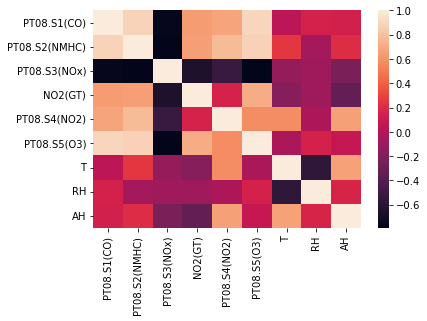

In [77]:
# Exploring the correlation between the features and the label shows that the feature PT08.S4(NO2) has a very weak 
# correlation of 0.15 with the label. However we chose to not drop this feature since in polynomial regression features
# could be combined and maybe combining other features with PT08.S4(NO2) will yield a higher correlation to the label.
corr=df.corr()
sns.heatmap(corr)
corr

### 4- Replace date feature

In [78]:
df['Date']=  pd.to_datetime(df['Date'])
df["Day"] = df['Date'].map(lambda x: x.day)
df["Month"] = df['Date'].map(lambda x: x.month)
df["Year"] = df['Date'].map(lambda x: x.year)
df = df.drop(['Date'], axis = 1)
df.columns

Index(['Time', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Day', 'Month', 'Year'],
      dtype='object')

### 5- Replace time feature

In [79]:
# The time and seconds features were dropped since all entries of these columns are zeros.
df[['Hour', 'Minutes', 'Seconds']] = df['Time'].str.split(':', expand=True)
df = df.drop('Time', axis =1)
df = df.drop('Minutes', axis =1)
df = df.drop('Seconds', axis =1)
df.columns

Index(['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Day', 'Month', 'Year',
       'Hour'],
      dtype='object')

### 6- Apply feature scaling

In [88]:
# Since it is more ideal to perform scaling after transforming to polynomial feature degree
# we performed feature scaling during the loops after transforming to a polynomial feature degree
X = df.drop('NO2(GT)',axis=1)
y = df['NO2(GT)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()

### 7- Evaluate different degrees of lasso CV polynomial regression

In [89]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


lasso_train_rmse_errors = []
lasso_test_rmse_errors = []

lasso_train_mse_errors = []
lasso_test_mse_errors = []

lasso_train_mae_errors = []
lasso_test_mae_errors = []
lasso_alphas = []

for d in range(1,7):
    
    print("Degree ", d)
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    #Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    #TRAIN ON THIS NEW POLY SET
    lasso_cv_model = LassoCV(alphas=(0.01, 0.1, 1.0, 10), tol=0.01, max_iter=10000)
    lasso_cv_model.fit(X_train,y_train)
    print(lasso_cv_model.alpha_)
    lasso_alphas.append(lasso_cv_model.alpha_)
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = lasso_cv_model.predict(X_train)
    test_pred = lasso_cv_model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    train_MSE = mean_squared_error(y_train,train_pred)
    train_MAE = mean_absolute_error(y_train,train_pred)
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
    test_MSE = mean_squared_error(y_test,test_pred)
    test_MAE = mean_absolute_error(y_test,test_pred)

    # Append errors to lists for plotting later
    
    print("Train RMSE: ", train_RMSE)
    print("Test RMSE: ",test_RMSE)
    lasso_train_rmse_errors.append(train_RMSE)
    lasso_train_mse_errors.append(train_MSE)
    lasso_train_mae_errors.append(train_MAE)

    lasso_test_mae_errors.append(test_MAE)
    lasso_test_rmse_errors.append(test_RMSE)
    lasso_test_mse_errors.append(test_MSE)
    

Degree  1
0.01
Train RMSE:  22.104959317114734
Test RMSE:  22.213178273563724
Degree  2
0.01
Train RMSE:  18.56019339074161
Test RMSE:  19.038996838364007
Degree  3
0.01
Train RMSE:  16.778539156475688
Test RMSE:  17.808071299494475
Degree  4
0.01
Train RMSE:  15.799475430093606
Test RMSE:  16.888768813845505
Degree  5
0.01
Train RMSE:  15.22557266810234
Test RMSE:  16.511887404650235
Degree  6
0.01
Train RMSE:  14.656051097049584
Test RMSE:  16.073440626745988


### 8- Choose the best degree and print the errors, model coefficients and the lasso parameters.

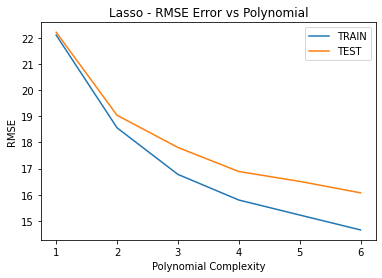

In [90]:
plt.plot(range(1,7),lasso_train_rmse_errors,label='TRAIN')
plt.plot(range(1,7),lasso_test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.title("Lasso - RMSE Error vs Polynomial")
plt.xticks([1,2,3,4,5, 6])
plt.legend()

In [91]:
print('Mean of NO2(GT)', df['NO2(GT)'].mean())
# Since the mean of the label is around 112, then a difference between test rmse and train rmse of 1.4
# is not considered overfitting. However we will choose degree 5 instead of 6 for the sake of the performance time.
print("Train RMSE")
print(lasso_train_rmse_errors[4])
print("Test RMSE")
print(lasso_test_rmse_errors[4])

print("Train MAE")
print(lasso_train_mae_errors[4])
print("Test MAE")
print(lasso_test_mae_errors[4])

print("Alpha")
print(lasso_alphas[4])

Mean of NO2(GT) 112.145137292033
Train RMSE
15.22557266810234
Test RMSE
16.511887404650235
Train MAE
11.168263988163764
Test MAE
11.726184412336446
Alpha
0.01


### 9a- Evaluate different degrees of Ridge CV polynomial regression

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


train_rmse_errors = []
test_rmse_errors = []
train_mae_errors = []
test_mae_errors = []
alphas = []

for d in range(1,7):
    print("Degree ", d)
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    #Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # TRAIN ON THIS NEW POLY SET
    # ridge_cv_model = RidgeCV(alphas=(0.1 ,1.0, 10))
    ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_squared_error')
    ridge_cv_model.fit(X_train,y_train)
    print("Alpha:", ridge_cv_model.alpha_)
    alphas.append(ridge_cv_model.alpha_)
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = ridge_cv_model.predict(X_train)
    test_pred = ridge_cv_model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    train_mae = mean_absolute_error(y_train,train_pred)
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
    test_mae = mean_absolute_error(y_train,train_pred)

    # Append errors to lists for plotting later
    
    print("Train RMSE: ", train_RMSE)
    print("Test RMSE: ", test_RMSE)
    print("Train MAE: ", train_mae)
    print("Test MAE: ", test_mae)
    print("----------------")
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

Degree  1
Alpha: 1.0
Train RMSE:  22.104446314771693
Test RMSE:  22.225818653358594
Train MAE:  16.504336361519442
Test MAE:  16.504336361519442
----------------
Degree  2
Alpha: 0.1
Train RMSE:  18.310759338531735
Test RMSE:  18.708606605294545
Train MAE:  13.597166610966209
Test MAE:  13.597166610966209
----------------
Degree  3
Alpha: 0.1
Train RMSE:  15.659403038696716
Test RMSE:  17.0905176857675
Train MAE:  11.526786612204987
Test MAE:  11.526786612204987
----------------
Degree  4
Alpha: 0.1
Train RMSE:  13.503887450140917
Test RMSE:  17.96461078033405
Train MAE:  9.88494312415989
Test MAE:  9.88494312415989
----------------
Degree  5
Alpha: 0.1
Train RMSE:  11.731232740162328
Test RMSE:  21.67998847004954
Train MAE:  8.59046753134511
Test MAE:  8.59046753134511
----------------
Degree  6
Alpha: 1.0
Train RMSE:  11.805863866573299
Test RMSE:  19.75372334164717
Train MAE:  8.613900621253016
Test MAE:  8.613900621253016
----------------


### 9b- Choose the best degree and print the errors, model coefficients and the Ridge parameters.

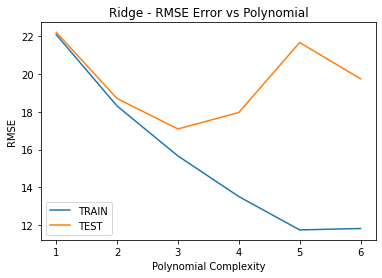

In [48]:
plt.plot(range(1,7),train_rmse_errors,label='TRAIN')
plt.plot(range(1,7),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.title("Ridge - RMSE Error vs Polynomial")
plt.xticks([1,2,3,4,5, 6])
plt.legend()

In [50]:
# Best degree is at degree 3 although there is a small gap between the training error and the test error, 
# however this difference is very small when compared to the mean value of the label. 
# Also, after the 3rd degree, overfitting occured with increasing complexity regardless of increasing regularization.
# We tried increasing the range of alpha values however that just delayed the increase in test rmse. 
# Therefore the best degree is at degree 3
print("Train RMSE")
print(train_rmse_errors[2])
print("Test RMSE")
print(test_rmse_errors[2])
print("Alphas")
print(alphas[2])


Train RMSE
15.659403038696716
Test RMSE
17.0905176857675
Alphas
0.1


### 10a- Evaluate different degrees of ElasticNet CV polynomial regression

In [51]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


en_train_rmse_errors = []
en_test_rmse_errors = []
en_train_mae_errors = []
en_test_mae_errors = []
en_ratios = []

for d in range(1,6):
    print("Degree: ", d)
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    #Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # TRAIN ON THIS NEW POLY SET
    elastic_model  = ElasticNetCV( l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01, max_iter=10000)
    elastic_model .fit(X_train,y_train)
    print("Ratio: ", elastic_model.l1_ratio_)
    en_ratios.append(elastic_model.l1_ratio_)

    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = elastic_model.predict(X_train)
    test_pred = elastic_model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    train_MAE = mean_absolute_error(y_train,train_pred)
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
    test_MAE = mean_absolute_error(y_test,test_pred)
    

    # Append errors to lists for plotting later
    
    print("Train RMSE: ",train_RMSE)
    print("Test RMSE: ",test_RMSE)
    en_train_rmse_errors.append(train_RMSE)
    en_test_rmse_errors.append(test_RMSE)
    en_train_mae_errors.append(train_MAE)
    en_test_mae_errors.append(test_MAE)

Degree:  1
Ratio:  1.0
Train RMSE:  22.111111099032478
Test RMSE:  22.170026638350155
Degree:  2
Ratio:  1.0
Train RMSE:  19.112301273049184
Test RMSE:  19.314435382887904
Degree:  3
Ratio:  1.0
Train RMSE:  17.591269529048407
Test RMSE:  18.131862497992064
Degree:  4
Ratio:  1.0
Train RMSE:  16.856552147441434
Test RMSE:  17.515332727845713
Degree:  5
Ratio:  0.99
Train RMSE:  16.392110953193654
Test RMSE:  17.27828711659284


### 10b- Choose the best degree and print the errors, model coefficients and ElasticNet parameters.

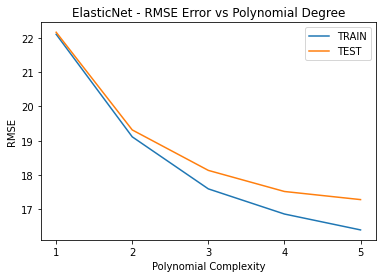

In [59]:
plt.plot(range(1,6),en_train_rmse_errors,label='TRAIN')
plt.plot(range(1,6),en_test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.title("ElasticNet - RMSE Error vs Polynomial Degree")
plt.xticks([1,2,3,4,5])
plt.legend()

In [61]:
#Since the gap between the 2 rmse of the train & test is around 0.9 which is considered a small difference since the range of 
# the label is in 10s and hundred, thus this is not really considered overfitting. 
# Therefore degree 5 will be chosen.
print("Train RMSE")
print(en_train_rmse_errors[4])
print("Test RMSE")
print(en_test_rmse_errors[4])

print("Train MAE")
print(en_train_mae_errors[4])
print("Test MAE")
print(en_test_mae_errors[4])

print("Ratio")
print(en_ratios[4])

Train RMSE
16.392110953193654
Test RMSE
17.27828711659284
Train MAE
12.030352126156721
Test MAE
12.26806753115988
Ratio
0.99


### 11- Compare the errors from the 3 regularization techniques, and save the best model.

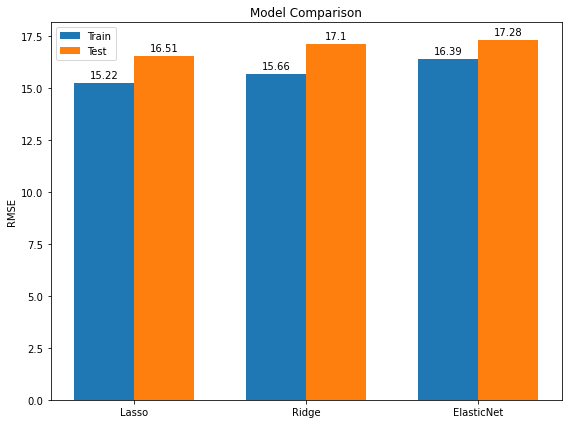

0.1

In [69]:
train_rmse = [15.22, 15.66, 16.39]
test_rmse = [16.51, 17.1, 17.28]
index = ['Lasso', 'Ridge', 'ElasticNet']
x = np.arange(len(index)) 
width = 0.35 
fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, train_rmse, width, label='Train')
rects2 = ax.bar(x + width/2, test_rmse, width, label='Test')
ax.set_ylabel('RMSE')
ax.set_title('Model Comparison')
ax.set_xticks(x, index)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.show()
0.1

In [109]:
from joblib import dump, load
#1. Choose final parameters based on test metrics which is Lasso with degree 5 and alpha =0.01
#2. Retrain on all data
#3. Save Polynomial Converter object
#3. Saving Scaler
#4. Saving Model

final_poly_converter = PolynomialFeatures(degree=5,include_bias=False)
final_model = Lasso(alpha=0.01)
final_poly_features = final_poly_converter.fit_transform(X)
final_scaler = StandardScaler()
final_scaler.fit_transform(final_poly_features)
final_model.fit(final_scaler.fit_transform(final_poly_features),y)

dump(final_scaler, 'scaler.joblib')
dump(final_model, 'final_model.joblib') 
dump(final_poly_converter,'final_converter.joblib')

/Users/alaaabdelazeem/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.854e+05, tolerance: 1.677e+03
  model = cd_fast.enet_coordinate_descent(


['final_converter.joblib']

### 12- Load the best model and test it on a sample that you manually created it.

In [110]:
loaded_poly = load('final_converter.joblib')
loaded_model = load('final_model.joblib')
loaded_scaler = load('scaler.joblib')

In [111]:
sample_dict = {'PT08.S1(CO)': 1200,'PT08.S2(NMHC)': 752, 'PT08.S3(NOx)': 1335, 'PT08.S4(NO2)': 1390, 
         'PT08.S5(O3)': 950, 'T':11, 'RH': 59.5, 'AH': 0.8, 'Day': 10, 'Month': 3, 'Year': '2004', 'Hour':23}
sample = pd.DataFrame(sample_dict, index=[0])

poly = loaded_poly.transform(sample)
scaled_sample = loaded_scaler.transform(poly)
prediction = loaded_model.predict(scaled_sample)
prediction


array([96.22348173])

## Great work!
----